In [ ]:
# READ ME
# This file was used to test 4 different algorithms on how well they improve the preformance of different machine learning models
# The algorithms we tested were SMOTE,ADASYN, SMOTE + TOMEK, SMOTE + ENN
# The machine Learning models that we tested were: GNB, KNN, and NN 

In [1]:
#Load libaries
import os
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
from pydotplus import graph_from_dot_data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC 
from sklearn import svm, metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score, KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
from collections import Counter

import warnings
warnings.filterwarnings('ignore')
            

In [2]:
#Load datasets
data = pd.read_csv('2013-data-output.csv', on_bad_lines='skip')   

In [ ]:
full_data = pd.read_csv('2013-data-output.csv', on_bad_lines='skip')   

In [4]:
full_data.describe()

,Unnamed: 0,Longitude,Latitude,EVI,TA,LST,Wind,Fire
count,9.776634e+07,9.776634e+07,9.776634e+07,9.776634e+07,9.776634e+07,9.776634e+07,9.776634e+07,9.776634e+07
mean,4.888317e+07,-1.211427e+02,3.865945e+01,2.721132e+03,4.840701e+00,1.465975e+04,2.362577e+01,8.186662e-04
std,2.822271e+07,1.764654e+00,2.271792e+00,1.005279e+03,8.004126e+00,8.995667e+02,1.557653e+01,2.860063e-02
min,0.000000e+00,-1.241544e+02,3.255906e+01,-3.000000e+03,-9.990000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.444159e+07,-1.227053e+02,3.720829e+01,2.042000e+03,5.000000e+00,1.423700e+04,1.200000e+01,0.000000e+00
50%,4.888317e+07,-1.213728e+02,3.923711e+01,2.736000e+03,5.000000e+00,1.468400e+04,2.100000e+01,0.000000e+00
75%,7.332476e+07,-1.199695e+02,4.031610e+01,3.408000e+03,5.000000e+00,1.513100e+04,3.100000e+01,0.000000e+00
max,9.776634e+07,-1.143189e+02,4.199499e+01,9.256000e+03,9.000000e+00,1.758000e+04,2.550000e+02,1.000000e+00


In [ ]:
full_data.isnull().sum() # return number of missing value for each column

In [ ]:
len(full_data)

In [ ]:
Count=full_data.Fire.value_counts() #count target feature 
Count

In [ ]:
print('Proportion:', round(Count[0] / Count[1], 2), ': 1')

# Cleaning the data

## Isolating to a spacific range of dates

In [ ]:
#Create a boolean mask for X time
mask = (data['Date'] >= '2013-01-02') & (data['Date'] <= '2013-04-02')
data = data[mask]
data.Date.value_counts()

## Data Cleaning

In [ ]:
data.head()

In [ ]:
data = data[data['Date'] != '2013-01-01'] #Dropping the first day that has missing LST data

In [ ]:
data.head()

In [ ]:
#if 'Date' in data:
data = data.drop(['Date', 'Longitude', 'Latitude'], axis = 1) 
data.head()

In [ ]:
data.isnull().sum() # return number of missing value for each column

In [ ]:
data.dropna(axis=0, inplace=True) # drop the rows with null values
data.isnull().sum() # return number of missing value for each column

In [ ]:
data.TA.value_counts()

In [ ]:
data = data[data.TA !=-999] 
data = data[data.TA != 3]
data = data[data.TA != 4]

In [ ]:
data.TA.value_counts()

In [ ]:
Count=data.Fire.value_counts() #count target feature 
Count

In [ ]:
print('Proportion:', round(Count[0] / Count[1], 2), ': 1')


In [ ]:
data.LST.value_counts()

In [ ]:
data.info()

In [ ]:
data.describe() # Statistic summary

## Dividing The Data to be sent to Gretel

In [25]:
#gretle_data = data[data.Fire == 1]
#print(len(gretle_data))
#len(data)-32

In [26]:
#gretle_data.to_csv('gretle_data.csv')

In [27]:
#data.to_csv('10_day_data.csv')

In [28]:
gretle_1_to_1 = pd.read_csv('gretle_data_1_to_1.csv', on_bad_lines='skip')
gretle_1_to_1.head()

,Unnamed: 0,EVI,TA,LST,Wind,Fire
0,1255766,-9999.0,5.0,13816.0,-9999.0,1.0
1,1247033,-9999.0,5.0,13825.0,-9999.0,1.0
2,1270936,-9999.0,5.0,13808.0,-9999.0,1.0
3,1394565,-9999.0,5.0,13818.0,-9999.0,1.0
4,1243489,-9999.0,5.0,13828.0,-9999.0,1.0


### Spliting Gretel Data

## Splitting Data & Scaling Data
We are making the data have similar range for the machine model to not weight one varible bigger then the other

In [ ]:
# Getting the X & Y
X = data.drop(columns=['Fire']).values
Y = data['Fire'].values
    
# Labeling the variables
scale = StandardScaler()
X = scale.fit_transform(X) 


In [ ]:
# 20% test 80% training data             
X_train, X_test, y_train, y_test, = train_test_split(X, Y, test_size=0.2,random_state = 42)

                                                         # 0.25 x 0.8 = 0.2 for validation data
X_train, X_val, y_train, y_val, = train_test_split(X_train, y_train, test_size=0.25,random_state = 16) 

In [ ]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

# Fixing the Imbalanced Data

## Oversamling Data

### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE(n_jobs=-1)
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

### ADASYN Technique

In [ ]:
from imblearn.over_sampling import ADASYN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130, n_jobs=-1)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

### SMOTE + Tomek Links

In [ ]:
from imblearn.combine import SMOTETomek

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139,n_jobs=-1)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

### SMOTE + ENN

In [ ]:
from imblearn.combine import SMOTEENN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN(n_jobs=-1)
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

# Building Models

## AUX Meathods

In [ ]:
save_location = str("saved_plots/")

In [ ]:
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()

In [ ]:
# Confusion Matrix Meathod
def confusion_matrix_build(y_test, predicted, model_name):
    NB_cm = confusion_matrix(y_test, predicted)
    group_names = ['TN','FP','FN','TP']
    group_counts = ["{0:0.0f}".format(value) for value in
                    NB_cm.flatten()]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(NB_cm,annot=labels,fmt='')
    plt.title(model_name)
    plt.ylabel('True label',fontweight='bold')
    plt.xlabel('Predicted label',fontweight='bold')
    plt.savefig(f"{save_location}{model_name}",dpi=300,bbox_inches='tight', transparent=True)

In [ ]:
def evaluation_report(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
    print('='*60)
    print('Confusion Matrix')
    confusion_matrix_build(y_test, y_pred, f"{algo}{sampling}")
          
    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)

## Gaussian Naive Bayes

### Gaussian Naive Bayes Original Data

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00  17765364
           1       0.00      0.00      0.00     14887

    accuracy                           1.00  17780251
   macro avg       0.50      0.50      0.50  17780251
weighted avg       1.00      1.00      1.00  17780251
 

AUC-ROC
0.8697097371537165
Confusion Matrix


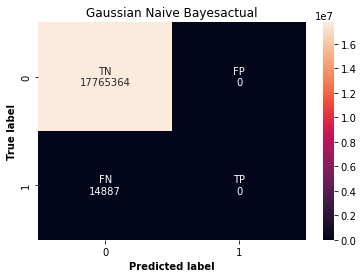

In [42]:
NB= GaussianNB(var_smoothing= 2.848035868435799e-08)
NB.fit(X_train, y_train)

evaluation_report(NB, X_test, y_test, 'Gaussian Naive Bayes', 'actual')

In [41]:
# #Hyperparameter Tuning for Gaussian Naive Bayes
#params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
#NB = GaussianNB()
#NB_ran = RandomizedSearchCV(NB, param_distributions=params_NB, 
#                            verbose=2, cv=3, random_state=42, n_iter=10, scoring='accuracy')
#NB_ran.fit(X_train, y_train)
#NB_ran.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ................var_smoothing=2.848035868435799e-08; total time=  18.0s
[CV] END ................var_smoothing=2.848035868435799e-08; total time=  15.4s
[CV] END ................var_smoothing=2.848035868435799e-08; total time=  17.2s
[CV] END ...............var_smoothing=1.5199110829529332e-05; total time=  17.1s
[CV] END ...............var_smoothing=1.5199110829529332e-05; total time=  15.5s
[CV] END ...............var_smoothing=1.5199110829529332e-05; total time=  15.4s
[CV] END ...............var_smoothing=4.3287612810830526e-07; total time=  15.7s
[CV] END ...............var_smoothing=4.3287612810830526e-07; total time=  12.9s
[CV] END ...............var_smoothing=4.3287612810830526e-07; total time=  16.5s
[CV] END ................var_smoothing=8.111308307896872e-05; total time=  13.8s
[CV] END ................var_smoothing=8.111308307896872e-05; total time=  14.4s
[CV] END ................var_smoothing=8.1113083

{'var_smoothing': 2.848035868435799e-08}

### Gaussian -- SMOTE

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.73      0.84  17765364
           1       0.00      0.89      0.01     14887

    accuracy                           0.73  17780251
   macro avg       0.50      0.81      0.42  17780251
weighted avg       1.00      0.73      0.84  17780251
 

AUC-ROC
0.869717935235238
Confusion Matrix


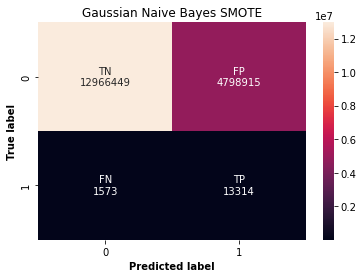

In [43]:
NB.fit(X_train_sm, y_train_sm)

evaluation_report(NB, X_test, y_test, 'Gaussian Naive Bayes', ' SMOTE')

### Gaussian -- ADASYN

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.73      0.84  17765364
           1       0.00      0.89      0.01     14887

    accuracy                           0.73  17780251
   macro avg       0.50      0.81      0.42  17780251
weighted avg       1.00      0.73      0.84  17780251
 

AUC-ROC
0.8696884006635736
Confusion Matrix


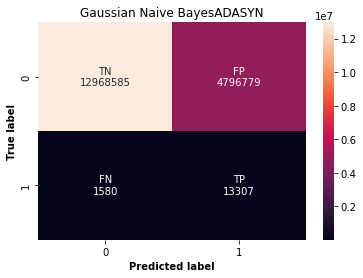

In [44]:
NB.fit(X_train_ada, y_train_ada)

evaluation_report(NB, X_test, y_test, 'Gaussian Naive Bayes', 'ADASYN')

### Gaussian -- SMOTE + TOMEK

In [ ]:
NB.fit(X_train_smtom, y_train_smtom)

evaluation_report(NB, X_test, y_test, 'Gaussian Naive Bayes', 'SMOTE + TOMEK')

### Gaussian -- SMOTE + ENN

In [ ]:
NB.fit(X_train_smenn, y_train_smenn)

evaluation_report(NB, X_test, y_test, 'Gaussian Naive Bayes', 'SMOTE + ENN')

## K - Nearest Neighbors

In [ ]:
KNN = KNeighborsClassifier(metric= 'euclidean', n_neighbors= 13, weights='uniform', n_jobs=-1)  
KNN.fit(X_train, y_train)

evaluation_report(KNN, X_test, y_test, 'KNN', ' Original')

In [ ]:
# #Hyperparameter Tuning for KNN
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=KNN, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### KNN - SMOTE

In [ ]:
KNN.fit(X_train_sm, y_train_sm)

evaluation_report(KNN, X_test, y_test, 'KNN ', 'SMOTE')

### KNN - ADASYN

In [ ]:
KNN.fit(X_train_ada, y_train_ada)

evaluation_report(KNN, X_test, y_test, 'KNN', ' ADASYN')

### KNN - SMOTE + TOMEK

In [ ]:
KNN.fit(X_train_smtom, y_train_smtom)

evaluation_report(KNN, X_test, y_test, 'KNN', ' SMOTE + TOMEK')

### KNN - SMOTE + ENN

In [ ]:
KNN.fit(X_train_smenn, y_train_smenn)

evaluation_report(KNN, X_test, y_test, 'KNN ', 'SMOTE + ENN')

## Neural Networks

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
#mpl = MLPClassifier(activation= 'tanh', alpha= 0.0001, hidden_layer_sizes= (20,), learning_rate= 'adaptive', solver= 'sgd')
mlp.fit(X_train,y_train)

NN_pred_train = mlp.predict(X_train)
NN_pred_test = mlp.predict(X_test)

evaluation_report(mlp, X_test, y_test, 'Neural Network', ' Original')

### NN - SMOTE

In [ ]:
mlp.fit(X_train_sm,y_train_sm)

evaluation_report(mlp, X_test, y_test, 'Neural Network', ' SMOTE')

### NN - ADASYN

In [ ]:
mlp.fit(X_train_ada,y_train_ada)

evaluation_report(mlp, X_test, y_test, 'Neural Network', ' ADASYN')

### NN - SMOTE + TOMEK

In [ ]:
mlp.fit(X_train_smtom,y_train_smtom)

evaluation_report(mlp, X_test, y_test, 'Neural Network', ' SMOTE + TOMEK')

### NN - SMOTE + ENN

In [ ]:
mlp.fit(X_train_smenn,y_train_smenn)

evaluation_report(mlp, X_test, y_test, 'Neural Network', ' SMOTE + ENN')

# Model Compereson

In [ ]:
clf_eval_df = pd.DataFrame({'model':model,
                            'resample':resample,
                            'precision':precision,
                            'recall':recall,
                            'f1-score':F1score,
                            'AUC-ROC':AUCROC})

In [ ]:
clf_eval_df

In [ ]:
sns.set(font_scale=1.2)
g = sns.FacetGrid(clf_eval_df, col="model", height=5)
g.map(sns.barplot, "resample", "recall", palette='twilight', order=["actual", "smote", "adasyn", "smote+tomek", "smote+enn"])
g.set_xticklabels(rotation=30)
g.set_xlabels(' ', fontsize=14)
g.set_ylabels('Recall', fontsize=14)